In [16]:
import pickle
import numpy as np

import pandas as pd
from scipy.stats.stats import pearsonr   

from matplotlib import pyplot as plt

import os
os.listdir("../../Data/data")

['PageTimes-2022-12-30.csv',
 'improv_ctrl_2022-12-30.csv',
 'improv_focus_2023-01-06.csv',
 'PageTimes-2023-01-06.csv']

In [2]:
scores_dict = pickle.load(open("scores.pkl", "rb"))

In [7]:
os.getcwd()

'/home/sneha/Caltech/Quarter4/Chen/improv/analysis'

In [8]:
ctrl = pd.read_csv('../../Data/data/improv_ctrl_2022-12-30.csv')
ctrl = ctrl[ctrl['participant.label'].notna()]
ctrl_1 = ctrl[ctrl["player.id_in_group"] == 1]

In [9]:
def filter_df_by_story(df, storynum, version='ctrl'):
    if storynum == 1:
        df = df[df["subsession.round_number"] <= 12]
    elif storynum == 2:
        df = df[(df["subsession.round_number"] > 12) & (df["subsession.round_number"] <= 30)]
    elif storynum == 3:
        if version == 'ctrl':
            df = df[(df["subsession.round_number"] > 30) & (df["subsession.round_number"] <= 42)]
        else:
            df = df[(df["subsession.round_number"] > 37) & (df["subsession.round_number"] <= 49)]
    elif storynum ==4:
        if version == 'ctrl':
            df = df[(df["subsession.round_number"] > 42) & (df["subsession.round_number"] <= 60)]
        else:
            df = df[(df["subsession.round_number"] > 49) & (df["subsession.round_number"] <= 67)]
    return df
    

In [10]:
def get_ratings_story(storynum, rating="player.o1"):
    subject_list = list(scores_dict.keys())
    ratings = []
    scores = []
    scores_subs = []
    for subject in subject_list:
        df = filter_df_by_story(ctrl_1, subject, storynum)
        scores_st = scores_dict[subject][storynum]
        if len(scores_st) == 0:
            continue
        
        try:
            ratings.append(df[rating].unique()[1])
            scores_subs.append(np.mean(scores_st))
        except:
            continue
            
    ratings = np.array(ratings)
    
    scores_subs = np.array(scores_subs)
    return ratings, scores_subs

In [11]:
ratings1, scores1 = get_ratings_story(1, rating="player.o1")
ratings2, scores2 = get_ratings_story(2, rating="player.o1")
ratings3, scores3 = get_ratings_story(3, rating="player.o1")
ratings4, scores4 = get_ratings_story(4, rating="player.o1")

print(pearsonr(ratings1, scores1))
print(pearsonr(ratings2, scores2))
print(pearsonr(ratings3, scores3))
print(pearsonr(ratings4, scores4))
print(pearsonr(np.concatenate([ratings1, ratings2, ratings3, ratings4]), np.concatenate([scores1, scores2, scores3, scores4])))

(0.3434690352308787, 0.07353506655276085)
(-0.17579764304223125, 0.37088358057598314)
(-0.056006954026450326, 0.7729132942182103)
(-0.19763583110239155, 0.3041065189484902)
(0.0012940580080567365, 0.9890976507561304)


In [12]:
ratings1, scores1 = get_ratings_story(1, rating="player.o2")
ratings2, scores2 = get_ratings_story(2, rating="player.o2")
ratings3, scores3 = get_ratings_story(3, rating="player.o2")
ratings4, scores4 = get_ratings_story(4, rating="player.o2")

print(pearsonr(ratings1, scores1))
print(pearsonr(ratings2, scores2))
print(pearsonr(ratings3, scores3))
print(pearsonr(ratings4, scores4))
print(pearsonr(np.concatenate([ratings1, ratings2, ratings3, ratings4]), np.concatenate([scores1, scores2, scores3, scores4])))

(0.0666786666111947, 0.7360268033986915)
(-0.07003353672982751, 0.7181021182401526)
(-0.11686274876772001, 0.5460316023210366)
(-0.2634843731185924, 0.16726675843663544)
(-0.07498847088054049, 0.42574195375041557)


In [13]:
ratings1, scores1 = get_ratings_story(1, rating="player.o3")
ratings2, scores2 = get_ratings_story(2, rating="player.o3")
ratings3, scores3 = get_ratings_story(3, rating="player.o3")
ratings4, scores4 = get_ratings_story(4, rating="player.o3")

print(pearsonr(ratings1, scores1))
print(pearsonr(ratings2, scores2))
print(pearsonr(ratings3, scores3))
print(pearsonr(ratings4, scores4))
print(pearsonr(np.concatenate([ratings1, ratings2, ratings3, ratings4]), np.concatenate([scores1, scores2, scores3, scores4])))

(0.16423899471822784, 0.4036381808865845)
(-0.0794489957203928, 0.6877769750065483)
(-0.25143210166556285, 0.18827529132895857)
(-0.17309868773807918, 0.36920325321338404)
(-0.05776024639104499, 0.5415809201727176)


In [14]:
ratings1, scores1 = get_ratings_story(1, rating="player.o4")
ratings2, scores2 = get_ratings_story(2, rating="player.o4")
ratings3, scores3 = get_ratings_story(3, rating="player.o4")
ratings4, scores4 = get_ratings_story(4, rating="player.o4")

print(pearsonr(ratings1, scores1))
print(pearsonr(ratings2, scores2))
print(pearsonr(ratings3, scores3))
print(pearsonr(ratings4, scores4))
print(pearsonr(np.concatenate([ratings1, ratings2, ratings3, ratings4]), np.concatenate([scores1, scores2, scores3, scores4])))

(-0.24607177513128423, 0.22560568468582234)
(-0.12052314506043821, 0.5334393789894356)
(-0.27686852964611025, 0.14594673804649652)
(-0.30320415451696203, 0.1167788480900556)
(-0.23455621961746803, 0.012799759719070145)


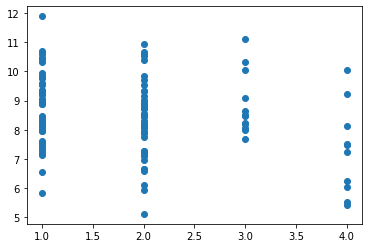

In [15]:
plt.scatter(np.concatenate([ratings1, ratings2, ratings3, ratings4]), np.concatenate([scores1, scores2, scores3, scores4]))